## Slimmed down fitting routine for the cluster

This version is a more slimmed version of the fitting notebooks.

In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import copy
import os as os
import logging
from functools import partial
from multiprocessing import Pool

#from scipy.optimize import leastsq # Levenberg-Marquadt Algorithm
from scipy.optimize import curve_fit

import tialn_fitting
from tialn_fitting import *

In [5]:
# Data file 
sample_path='/data/visitors/nanomax/20190570/2019041008/process/as_deposited_2nd_indent_no_load/'
os.chdir(sample_path)
print(os.getcwd())
#print(os.listdir(sample_path))
extension='.h5'
for file in os.listdir(sample_path):
    if file.endswith(extension):
        print(os.path.join(file))


        
#sample_file='fit_example3.h5'
#sample_file='fit_example2.h5'        
#sample_file='scan_0000_pil1m_0000_integ_step.h5'

#sample_file='scan_0000_pil1m_0000_integ_step.h5'
# improved mask in comparison to before
sample_file='2019-09-20T05_09_30.130000_scan_0000_pil1m_0000_integ_step.h5'

source=sample_path+sample_file

output_path=sample_path


/data/visitors/nanomax/20190570/2019041008/process/as_deposited_2nd_indent_no_load
2019-09-20T05_09_30.130000_scan_0000_pil1m_0000_integ_step.h5
2019-09-20T18_54_09.544259_scan_0000_pil1m_0000_integ_step.h5
fit_example3.h5
fit_example2.h5
._scan_0000_pil1m_0000_integ_step.h5
scan_0000_pil1m_0000_integ_step.h5


In [ ]:
file1=Read1DPilatusData(source,output_path)
q_array,integration_array,sigma_array,azimuth_array=file1.data_read()

[3384, 3385, 3386, 3455, 3456, 3457, 3526, 3527, 3528]
[[3384 3385 3386]
 [3455 3456 3457]
 [3526 3527 3528]]
Dummy output
Warning! Some TiN peaks are fixed.
Warning! Some h-Aln peaks are fixed.
Warning! Deep substrate peaks are fixed.

nchi 0, chi_range (-7.5 7.5)
[[0.2      2.506    0.02     0.      ]
 [5.1      2.669    0.7      1.      ]
 [5.1      2.669    0.014    0.3     ]
 [4.3      3.076    0.03     0.8     ]
 [0.1      3.345    0.017    0.      ]
 [1.8      4.363    0.035    0.4     ]
 [0.6      5.116    0.04     0.4     ]
 [0.5      5.345    0.04     0.4     ]
 [0.       2.561    0.01769  0.183   ]
 [0.       2.957    0.029269 0.74    ]
 [0.       4.18     0.029269 0.74    ]
 [0.       4.9      0.029269 0.74    ]
 [0.       5.915    0.029269 0.74    ]
 [0.       1.       0.029269 0.74    ]
 [0.       1.7      0.029269 0.74    ]
 [0.       2.328053 0.029269 0.74    ]
 [0.       2.51856  0.029269 0.74    ]
 [0.       2.644218 0.029269 0.74    ]
 [0.       3.433596 0.029269 0.7

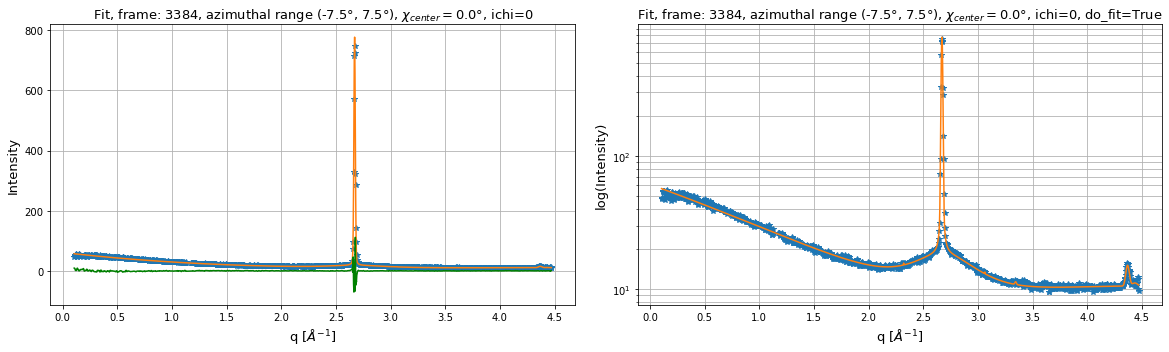

----> Succeed to fit with:  functools.partial(<bound method Fit1DPilatusData.fitting of <tialn_fitting.Fit1DPilatusData object at 0x7fc80a6ef0b8>>, ps1=True, tialn_ind=[0], ps2=True, ps3=True, aln_ind=[16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28], ps4=True, bkg_ho=True, do_fit=True, do_show=True) 
++++++++++++++++++++++++++++++++++++++++++++++++
IROW 3385 

#############
ICHI 0

Trying fitting with :  3385 0 functools.partial(<bound method Fit1DPilatusData.fitting of <tialn_fitting.Fit1DPilatusData object at 0x7fc80a6ef0b8>>, ps1=True, tialn_ind=[0], ps2=True, ps3=True, aln_ind=[16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28], ps4=True, bkg_ho=True, do_fit=True, do_show=True)
Warning! Some TiAlN peaks are fixed. Peak(s) fixed: [0]
Warning! Some TiN peaks are fixed.
Warning! Some h-Aln peaks are fixed.
Warning! Deep substrate peaks are fixed.
----> Fail to fit with:  3385 0 Optimal parameters not found: The maximum number of function evaluations is exceeded. 
 functools.partial(<boun

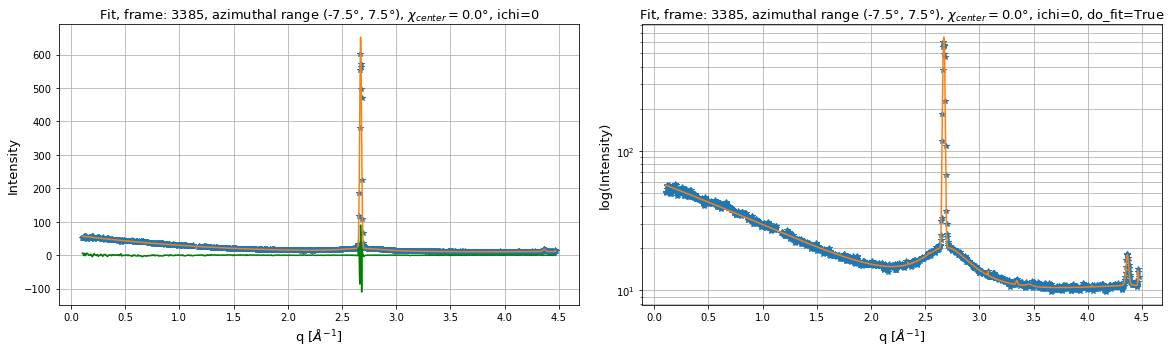

----> Succeed to fit with:  functools.partial(<bound method Fit1DPilatusData.fitting of <tialn_fitting.Fit1DPilatusData object at 0x7fc80a6ef0b8>>, ps1=False, tialn_ind=[], ps2=True, ps3=False, ps4=True, bkg_ho=True, do_fit=True, do_show=True) 
++++++++++++++++++++++++++++++++++++++++++++++++
IROW 3386 

#############
ICHI 0

Trying fitting with :  3386 0 functools.partial(<bound method Fit1DPilatusData.fitting of <tialn_fitting.Fit1DPilatusData object at 0x7fc80a6ef0b8>>, ps1=True, tialn_ind=[0], ps2=True, ps3=True, aln_ind=[16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28], ps4=True, bkg_ho=True, do_fit=True, do_show=True)
Warning! Some TiAlN peaks are fixed. Peak(s) fixed: [0]
Warning! Some TiN peaks are fixed.
Warning! Some h-Aln peaks are fixed.
Warning! Deep substrate peaks are fixed.

nchi 0, chi_range (-7.5 7.5)
[[0.00000000e+00 2.50600000e+00 2.00000000e-02 0.00000000e+00]
 [7.43020004e+00 2.68908365e+00 5.12606790e-01 1.00000000e+00]
 [1.54240181e+01 2.67089158e+00 1.84540986e-

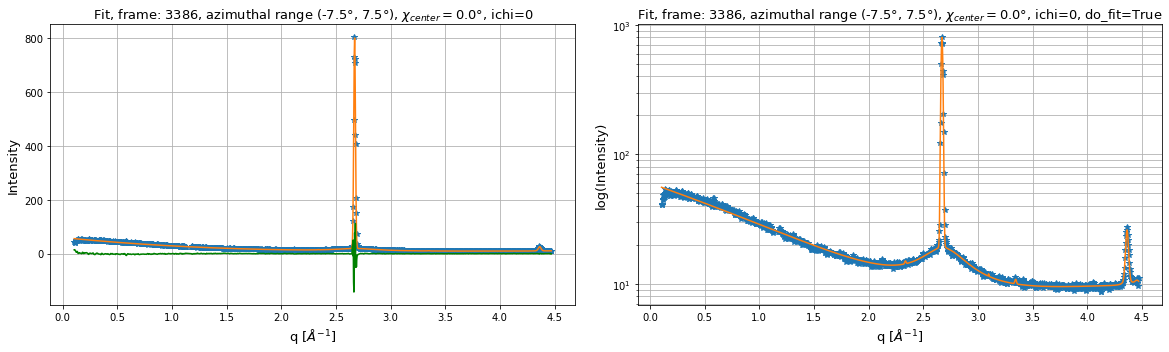

----> Succeed to fit with:  functools.partial(<bound method Fit1DPilatusData.fitting of <tialn_fitting.Fit1DPilatusData object at 0x7fc80a6ef0b8>>, ps1=True, tialn_ind=[0], ps2=True, ps3=True, aln_ind=[16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28], ps4=True, bkg_ho=True, do_fit=True, do_show=True) 
++++++++++++++++++++++++++++++++++++++++++++++++
IROW 3455 

#############
ICHI 0

Trying fitting with :  3455 0 functools.partial(<bound method Fit1DPilatusData.fitting of <tialn_fitting.Fit1DPilatusData object at 0x7fc80a6ef0b8>>, ps1=True, tialn_ind=[0], ps2=True, ps3=True, aln_ind=[16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28], ps4=True, bkg_ho=True, do_fit=True, do_show=True)
Warning! Some TiAlN peaks are fixed. Peak(s) fixed: [0]
Warning! Some TiN peaks are fixed.
Warning! Some h-Aln peaks are fixed.
Warning! Deep substrate peaks are fixed.

nchi 0, chi_range (-7.5 7.5)
[[0.00000000e+00 2.50600000e+00 2.00000000e-02 0.00000000e+00]
 [7.46269317e+00 2.69400000e+00 6.01963086e-01 9.1

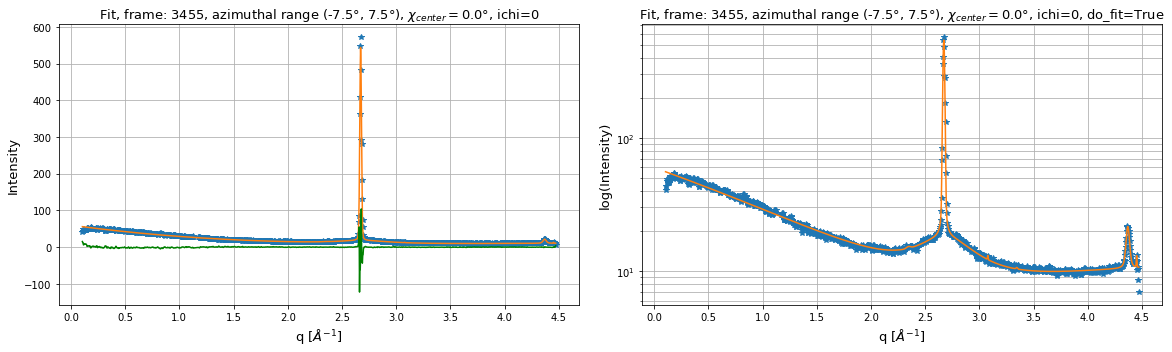

----> Succeed to fit with:  functools.partial(<bound method Fit1DPilatusData.fitting of <tialn_fitting.Fit1DPilatusData object at 0x7fc80a6ef0b8>>, ps1=True, tialn_ind=[0], ps2=True, ps3=True, aln_ind=[16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28], ps4=True, bkg_ho=True, do_fit=True, do_show=True) 
++++++++++++++++++++++++++++++++++++++++++++++++
IROW 3456 

#############
ICHI 0

Trying fitting with :  3456 0 functools.partial(<bound method Fit1DPilatusData.fitting of <tialn_fitting.Fit1DPilatusData object at 0x7fc80a6ef0b8>>, ps1=True, tialn_ind=[0], ps2=True, ps3=True, aln_ind=[16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28], ps4=True, bkg_ho=True, do_fit=True, do_show=True)
Warning! Some TiAlN peaks are fixed. Peak(s) fixed: [0]
Warning! Some TiN peaks are fixed.
Warning! Some h-Aln peaks are fixed.
Warning! Deep substrate peaks are fixed.
----> Fail to fit with:  3456 0 Optimal parameters not found: The maximum number of function evaluations is exceeded. 
 functools.partial(<boun

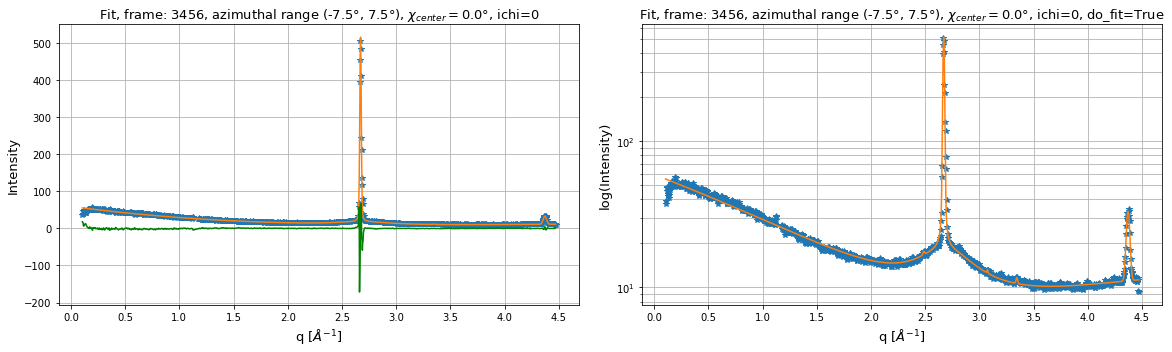

----> Succeed to fit with:  functools.partial(<bound method Fit1DPilatusData.fitting of <tialn_fitting.Fit1DPilatusData object at 0x7fc80a6ef0b8>>, ps1=False, tialn_ind=[], ps2=True, ps3=True, ps4=True, bkg_ho=True, do_fit=True, do_show=True) 
++++++++++++++++++++++++++++++++++++++++++++++++
IROW 3457 

#############
ICHI 0

Trying fitting with :  3457 0 functools.partial(<bound method Fit1DPilatusData.fitting of <tialn_fitting.Fit1DPilatusData object at 0x7fc80a6ef0b8>>, ps1=True, tialn_ind=[0], ps2=True, ps3=True, aln_ind=[16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28], ps4=True, bkg_ho=True, do_fit=True, do_show=True)
Warning! Some TiAlN peaks are fixed. Peak(s) fixed: [0]
Warning! Some TiN peaks are fixed.
Warning! Some h-Aln peaks are fixed.
Warning! Deep substrate peaks are fixed.
----> Fail to fit with:  3457 0 Optimal parameters not found: The maximum number of function evaluations is exceeded. 
 functools.partial(<bound method Fit1DPilatusData.fitting of <tialn_fitting.Fit1DP

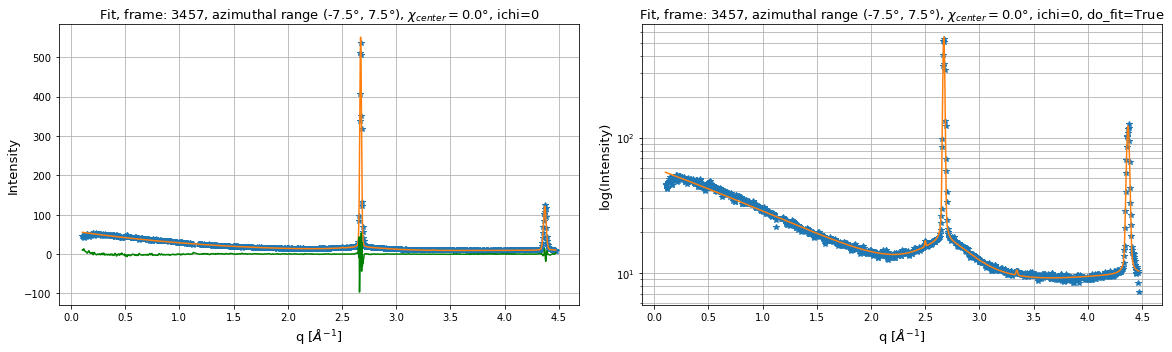

----> Succeed to fit with:  functools.partial(<bound method Fit1DPilatusData.fitting of <tialn_fitting.Fit1DPilatusData object at 0x7fc80a6ef0b8>>, ps1=False, tialn_ind=[], ps2=True, ps3=True, ps4=True, bkg_ho=True, do_fit=True, do_show=True) 
++++++++++++++++++++++++++++++++++++++++++++++++
IROW 3526 

#############
ICHI 0

Trying fitting with :  3526 0 functools.partial(<bound method Fit1DPilatusData.fitting of <tialn_fitting.Fit1DPilatusData object at 0x7fc80a6ef0b8>>, ps1=True, tialn_ind=[0], ps2=True, ps3=True, aln_ind=[16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28], ps4=True, bkg_ho=True, do_fit=True, do_show=True)
Warning! Some TiAlN peaks are fixed. Peak(s) fixed: [0]
Warning! Some TiN peaks are fixed.
Warning! Some h-Aln peaks are fixed.
Warning! Deep substrate peaks are fixed.

nchi 0, chi_range (-7.5 7.5)
[[0.00000000e+00 2.50600000e+00 2.00000000e-02 0.00000000e+00]
 [9.47822221e+00 2.69400000e+00 6.50350211e-01 9.99997381e-01]
 [7.42290998e+00 2.67332360e+00 1.32306069e-0

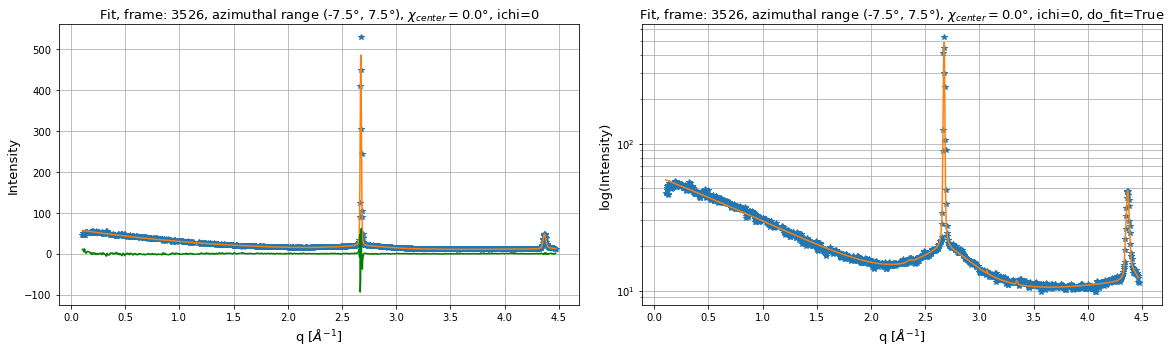

----> Succeed to fit with:  functools.partial(<bound method Fit1DPilatusData.fitting of <tialn_fitting.Fit1DPilatusData object at 0x7fc80a6ef0b8>>, ps1=True, tialn_ind=[0], ps2=True, ps3=True, aln_ind=[16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28], ps4=True, bkg_ho=True, do_fit=True, do_show=True) 
++++++++++++++++++++++++++++++++++++++++++++++++
IROW 3527 

#############
ICHI 0

Trying fitting with :  3527 0 functools.partial(<bound method Fit1DPilatusData.fitting of <tialn_fitting.Fit1DPilatusData object at 0x7fc80a6ef0b8>>, ps1=True, tialn_ind=[0], ps2=True, ps3=True, aln_ind=[16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28], ps4=True, bkg_ho=True, do_fit=True, do_show=True)
Warning! Some TiAlN peaks are fixed. Peak(s) fixed: [0]
Warning! Some TiN peaks are fixed.
Warning! Some h-Aln peaks are fixed.
Warning! Deep substrate peaks are fixed.

nchi 0, chi_range (-7.5 7.5)
[[0.00000000e+00 2.50600000e+00 2.00000000e-02 0.00000000e+00]
 [8.81464329e+00 2.69400000e+00 6.36037081e-01 1.0

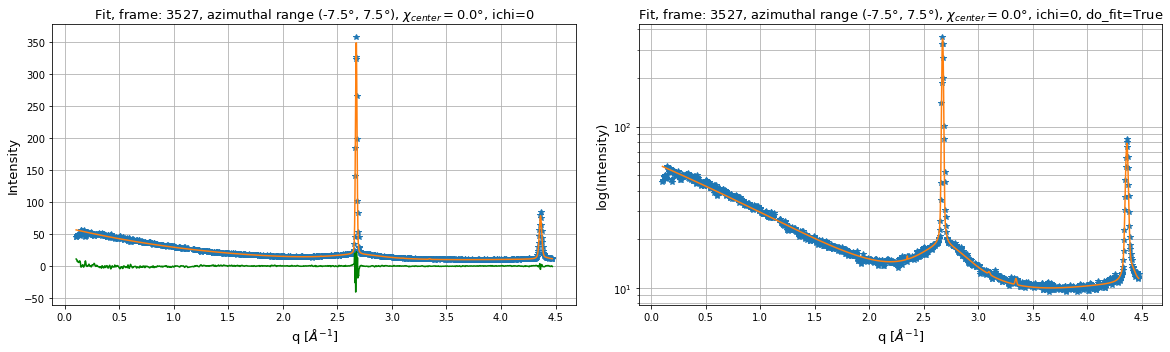

----> Succeed to fit with:  functools.partial(<bound method Fit1DPilatusData.fitting of <tialn_fitting.Fit1DPilatusData object at 0x7fc80a6ef0b8>>, ps1=True, tialn_ind=[0], ps2=True, ps3=True, aln_ind=[16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28], ps4=True, bkg_ho=True, do_fit=True, do_show=True) 
++++++++++++++++++++++++++++++++++++++++++++++++
IROW 3528 

#############
ICHI 0

Trying fitting with :  3528 0 functools.partial(<bound method Fit1DPilatusData.fitting of <tialn_fitting.Fit1DPilatusData object at 0x7fc80a6ef0b8>>, ps1=True, tialn_ind=[0], ps2=True, ps3=True, aln_ind=[16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28], ps4=True, bkg_ho=True, do_fit=True, do_show=True)
Warning! Some TiAlN peaks are fixed. Peak(s) fixed: [0]
Warning! Some TiN peaks are fixed.
Warning! Some h-Aln peaks are fixed.
Warning! Deep substrate peaks are fixed.

nchi 0, chi_range (-7.5 7.5)
[[0.00000000e+00 2.50600000e+00 2.00000000e-02 0.00000000e+00]
 [7.67219092e+00 2.69400000e+00 5.63142694e-01 9.9

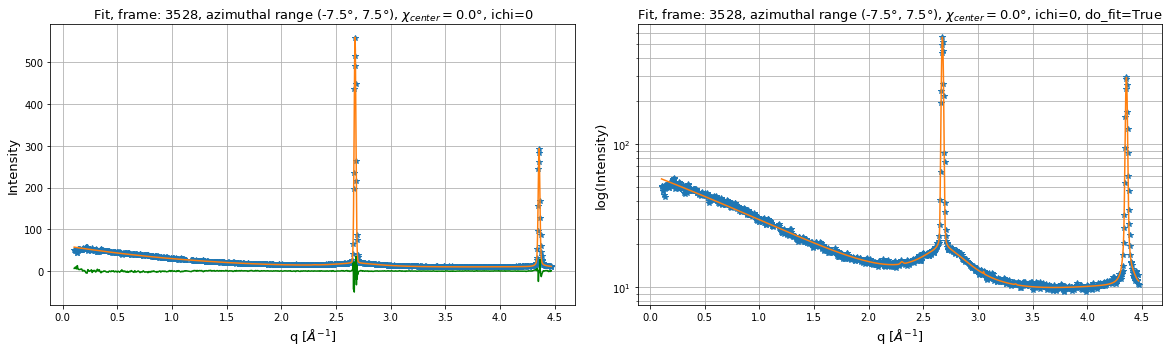

----> Succeed to fit with:  functools.partial(<bound method Fit1DPilatusData.fitting of <tialn_fitting.Fit1DPilatusData object at 0x7fc80a6ef0b8>>, ps1=True, tialn_ind=[0], ps2=True, ps3=True, aln_ind=[16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28], ps4=True, bkg_ho=True, do_fit=True, do_show=True) 
#######################################
[[[[0.00000000e+00 2.50600000e+00 2.00000000e-02 0.00000000e+00]
   [7.47173979e+00 2.69400000e+00 6.43683506e-01 7.94708214e-01]
   [1.31126469e+01 2.67071936e+00 1.50964010e-02 2.08215228e-01]
   ...
   [0.00000000e+00 5.56792200e+00 2.92690000e-02 7.40000000e-01]
   [0.00000000e+00 6.01243100e+00 2.92690000e-02 7.40000000e-01]
   [0.00000000e+00 6.17847200e+00 2.92690000e-02 7.40000000e-01]]

  [[4.53010924e-03 2.53100000e+00 9.62296905e-03 1.74559408e-17]
   [8.44280516e+00 2.69400000e+00 5.27516535e-01 9.99999973e-01]
   [1.33159556e+01 2.67162332e+00 1.97718949e-02 6.43732063e-09]
   ...
   [0.00000000e+00 5.56792200e+00 2.92690000e-02 7.400000

In [21]:
import importlib
importlib.reload(tialn_fitting)

fit1=Fit1DPilatusData(source,output_path,q_array,integration_array,sigma_array,azimuth_array)
from time import time
#irows =  range(2530, 2545)
irows=[2537]

irows=[2535]
chi_index=[4]


#irows=[2520]
#chi_index=[9]


#chi_index=range(0,8)
#chi_index=[0,1,2,3,5,6,8]
#chi_index=[0]
#chi_index=[x for x in range(0,fit1.nchi)]  #all available chi-directions


irows=[2169]
chi_index=[0]


# Play with get_irows
#Shape frames
x_start=47
x_end=50
y_start=47
y_end=50
x_len=71
irows=fit1.get_irows(x_start, x_end, y_start, y_end,  x_len)
print(irows)
reshaped_irows=np.reshape(irows,(x_end-x_start,y_end-y_start))
print(reshaped_irows)
chi_index=[0]

#frame 1440, 1441 missing peak! (all one having a missing peak in area 20,23,20,23,71)


t0 = time()
output=fit1.multi_fitting(irows,chi_index)
t1 = time()

print(t1 - t0)

(3, 3)
2
<class 'numpy.ndarray'>
/data/visitors/nanomax/20190570/2019041008/process/as_deposited_2nd_indent_no_load


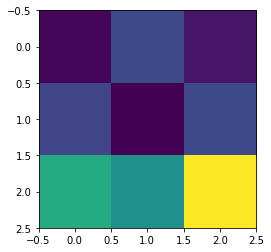

In [22]:
# peak positions: parameter on pos=1
#dset_p[:,:,:,1]
# peak positions of 2nd peak(peak on pos 1): parameter on pos=1
#dset_p[:,:,1,1]


np.shape(output[1])
# first output, chi_index, all images, 2nd_peak, parameter 1 for this peak
result=output[0][0,:,2,1]
result_reshaped=np.reshape(result,(x_end-x_start,y_end-y_start))
#print(result_reshaped)

#print(reshaped_irows)

print(np.shape(reshaped_irows))
print(reshaped_irows.ndim)
print(type(result_reshaped))

plt.figure()
plt.imshow(result_reshaped)

!pwd

#output_name="2019-09-20T05_09_30.130000_scan_0000_pil1m_0000_integ_step.h5_20_50_20_50_71.npy"
#np.save(output_name, output)

In [29]:
np.shape(output[1])

(10, 9, 29, 4)